# 3-qubit GHZ state on IonQ via Azure Quantum

This example notebook shows how to create and measure a 3-qubit GHZ state on the IonQ Quantum Computing target.

To install all dependencies for this example, please run:

In [ ]:
!pip install azure-quantum==0.18.2109.165000a1 --quiet --extra-index-url=https://pkgs.dev.azure.com/ms-quantum-public/9af4e09e-a436-4aca-9559-2094cfe8d80c/_packaging/alpha/pypi/simple/
!pip install matplotlib --quiet

## Connecting to the Azure Quantum service

To connect to the Azure Quantum service, find the resource ID and location of your Workspace from the Azure Quantum portal here: https://portal.azure.com. Navigate to your Azure Quantum workspace and copy the values from the header.

<img src="copy_resource_id.png">

In [1]:
from azure.quantum import Workspace
from azure.quantum.target import IonQ

# Enter your workspace details here
# Find your resource ID and location via portal.azure.com
workspace = Workspace(
    resource_id="",
    location=""
)

In [2]:
# Get workspace targets
workspace.get_targets()

{'Microsoft': ['microsoft.simulatedannealing.fpga',
  'microsoft.simulatedannealing-parameterfree.fpga',
  'microsoft.paralleltempering-parameterfree.cpu',
  'microsoft.paralleltempering.cpu',
  'microsoft.simulatedannealing-parameterfree.cpu',
  'microsoft.simulatedannealing.cpu',
  'microsoft.tabu-parameterfree.cpu',
  'microsoft.tabu.cpu',
  'microsoft.qmc.cpu',
  'microsoft.populationannealing.cpu',
  'microsoft.substochasticmontecarlo.cpu',
  'microsoft.substochasticmontecarlo-parameterfree.cpu',
  'microsoft.populationannealing-parameterfree.cpu'],
 'ionq': ['ionq.qpu', 'ionq.simulator']}

In [3]:
# See https://docs.ionq.com/#tag/quantum_programs for JSON format spec
circuit = {
    "qubits": 3,
    "circuit": [
        {
        "gate": "h",
        "target": 0
        },
        {
        "gate": "cnot",
        "control": 0,
        "target": 1
        },
        {
        "gate": "cnot",
        "control": 0,
        "target": 2
        },
    ]
}

### Run on IonQ Simulator

In [4]:
target = IonQ(workspace=workspace, target="ionq.simulator")
job = target.submit(circuit)

In [5]:
job.id

'3ca1a162-faea-11eb-9e93-00155df1914a'

In [6]:
results = job.get_results()
results

.....

{'duration': 8240356, 'histogram': {'0': 0.5, '7': 0.5}}

Text(0, 0.5, 'Probabilities')

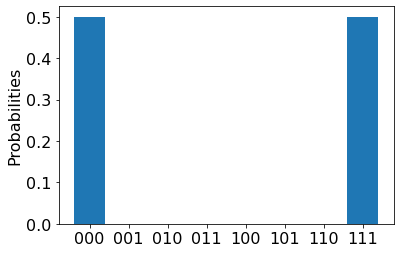

In [7]:
%matplotlib inline
import pylab as pl
pl.rcParams["font.size"] = 16
hist = {format(n, "03b"): 0 for n in range(8)}
hist.update({format(int(k), "03b"): v for k, v in results["histogram"].items()})
pl.bar(hist.keys(), hist.values())
pl.ylabel("Probabilities")

### Run on IonQ QPU (note: depending on queue times this may take a while to run!)

In [8]:
qpu_target = IonQ(workspace=workspace, target="ionq.qpu")
qpu_job = qpu_target.submit(circuit)
qpu_job.id

'7a14dd3e-fa72-11eb-83af-00155df1914a'

In [10]:
results = qpu_job.get_results()
results

{'histogram': {'0': 0.59, '2': 0.01, '3': 0.03, '7': 0.37}}

Text(0, 0.5, 'Probabilities')

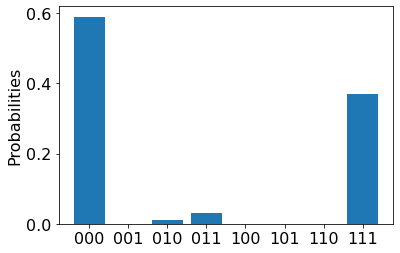

In [11]:
pl.rcParams["font.size"] = 16
hist = {format(n, "03b"): 0 for n in range(8)}
hist.update({format(int(k), "03b"): v for k, v in results["histogram"].items()})
pl.bar(hist.keys(), hist.values())
pl.ylabel("Probabilities")